In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [22]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions
from triple_agent.reports.mission_choices import mission_choices
from triple_agent.reports.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_role)
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.utilities.event_constants import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.utilities.roles import Roles

In [4]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [99]:
division = 'Copper'

In [100]:
div_replays = get_parsed_replays(lambda g: g.division == division and g.event == 'SCL5' and g.spy not in SCL5_DROPPED_PLAYERS and g.sniper not in SCL5_DROPPED_PLAYERS)

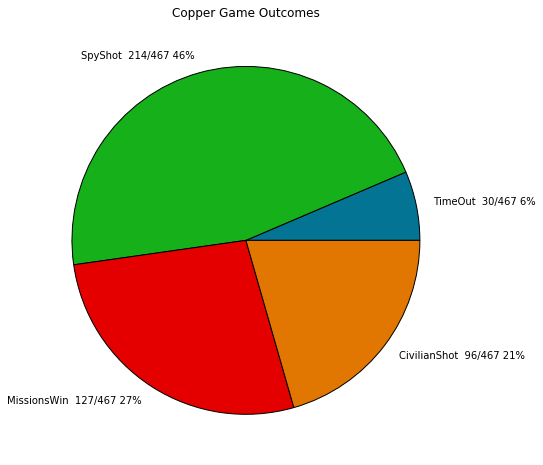

In [101]:
game_outcomes(div_replays, f"{division} Game Outcomes")

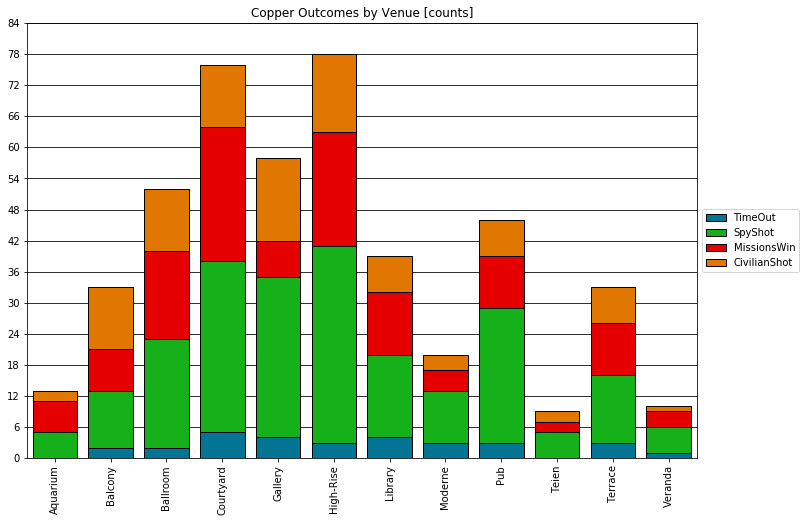

In [102]:
game_outcomes(div_replays, f"{division} Outcomes by Venue", groupby=lambda g: g.venue, percentile_plot=False)

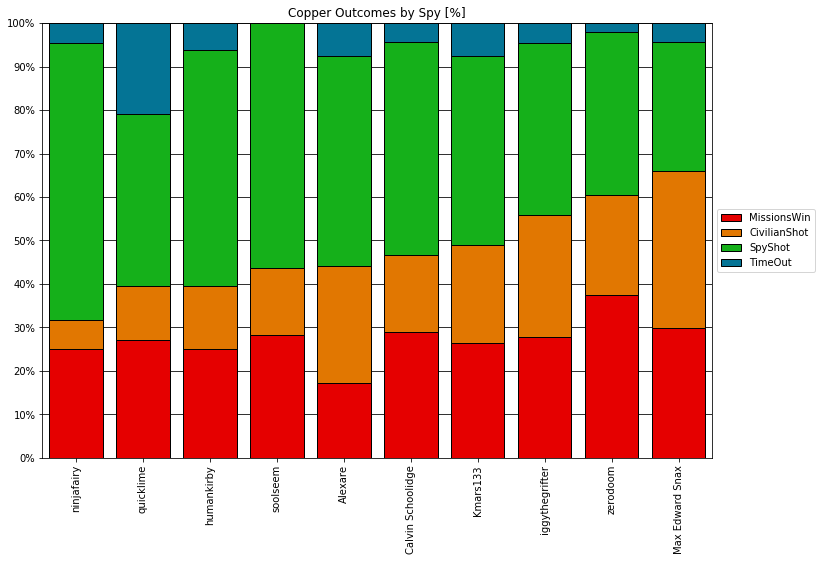

In [103]:
game_outcomes(
    div_replays,
    f"{division} Outcomes by Spy",
    groupby=lambda g: g.spy,
    counts_plot=False,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    category_data_order=sort_by_spy_wins
)

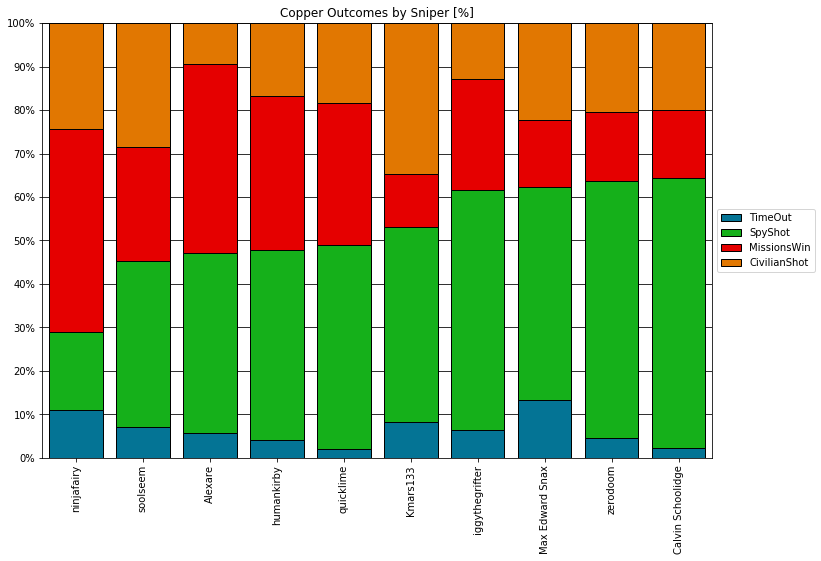

In [104]:
game_outcomes(
    div_replays,
    f"{division} Outcomes by Sniper",
    groupby=lambda g: g.sniper,
    counts_plot=False,
    category_data_order=sort_by_spy_wins,
    reversed_data_sort=True
)

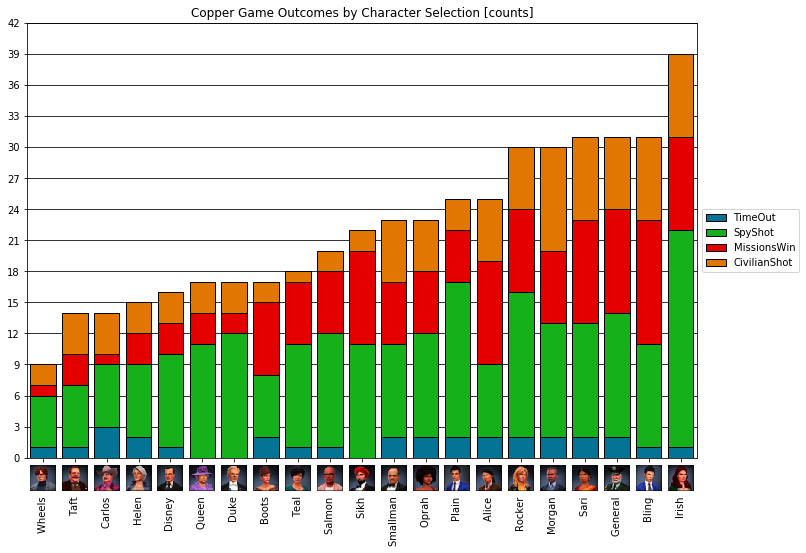

In [105]:
game_outcomes(
    div_replays,
    f"{division} Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False
)

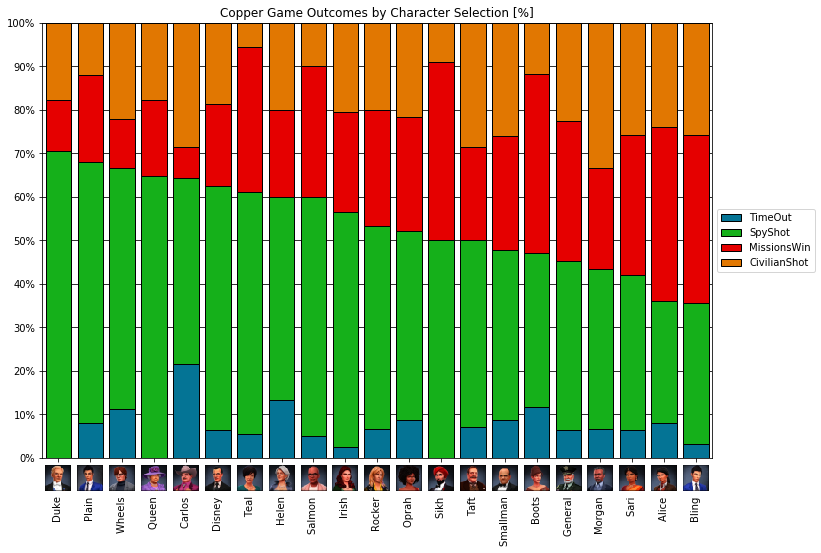

In [106]:
game_outcomes(
    div_replays,
    f"{division} Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

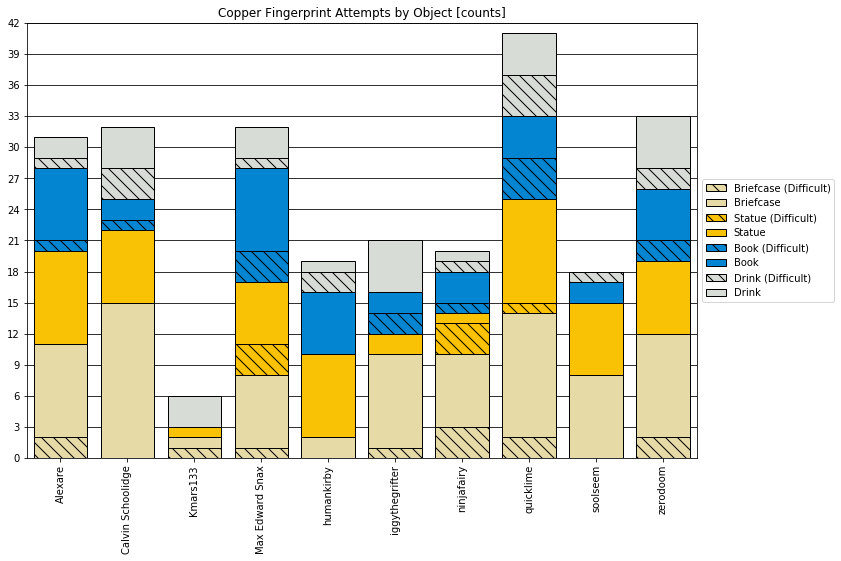

In [107]:
attempted_fingerprint_sources(
    div_replays,
    f"{division} Fingerprint Attempts by Object",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

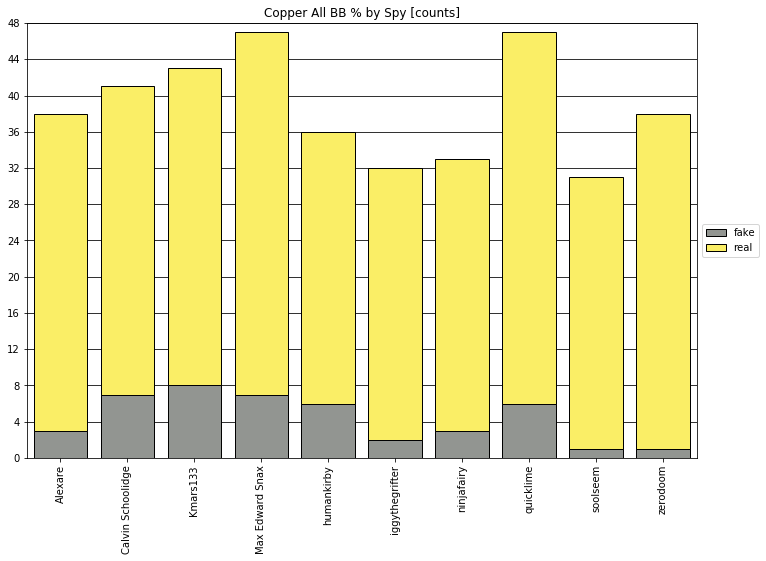

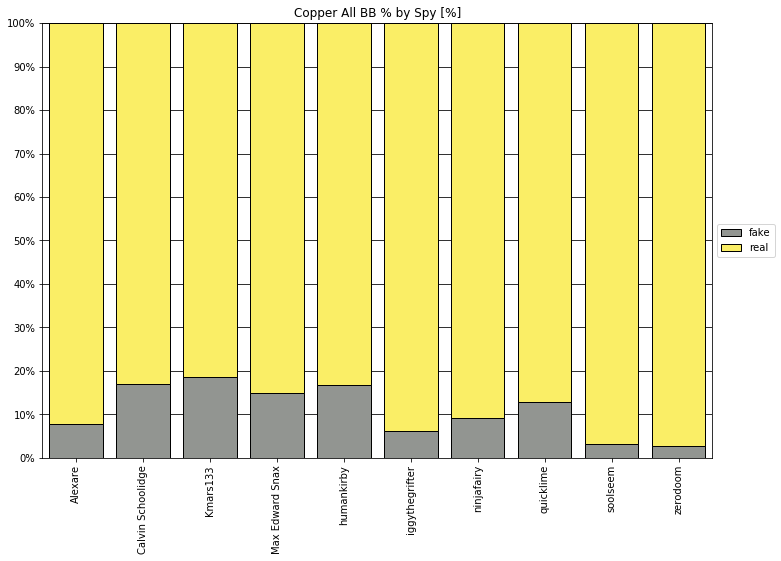

In [108]:
all_banana_bread_percentages(div_replays, f"{division} All BB % by Spy",
    groupby=lambda g: g.spy,
)

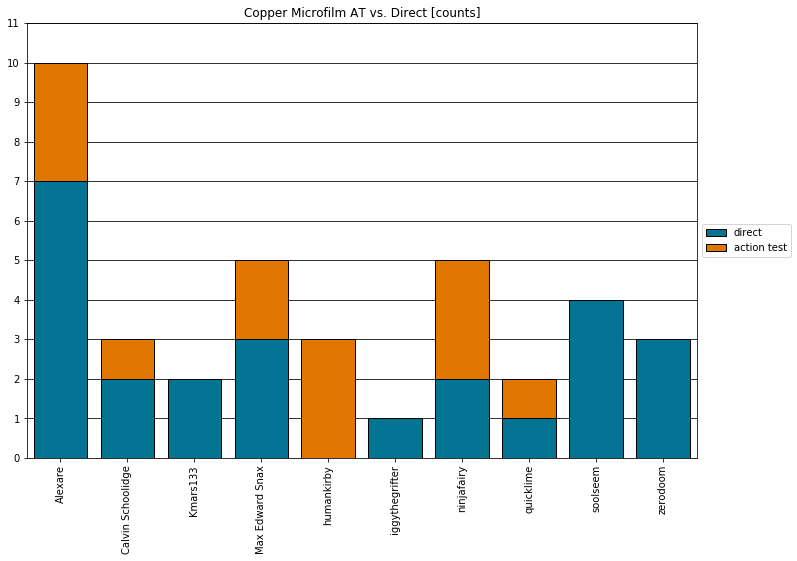

In [109]:
at_or_direct_mf(
    div_replays,
    f"{division} Microfilm AT vs. Direct",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

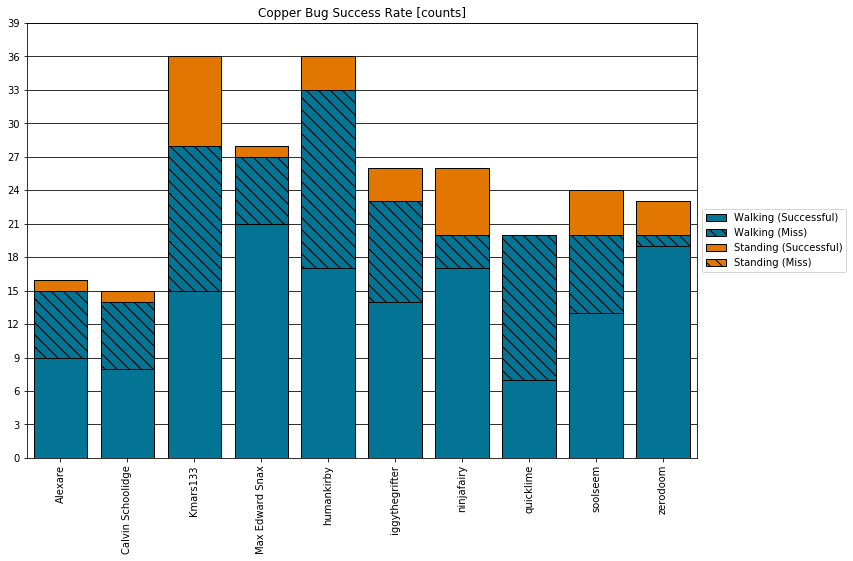

In [110]:
bug_success_rate(div_replays,
    f"{division} Bug Success Rate",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

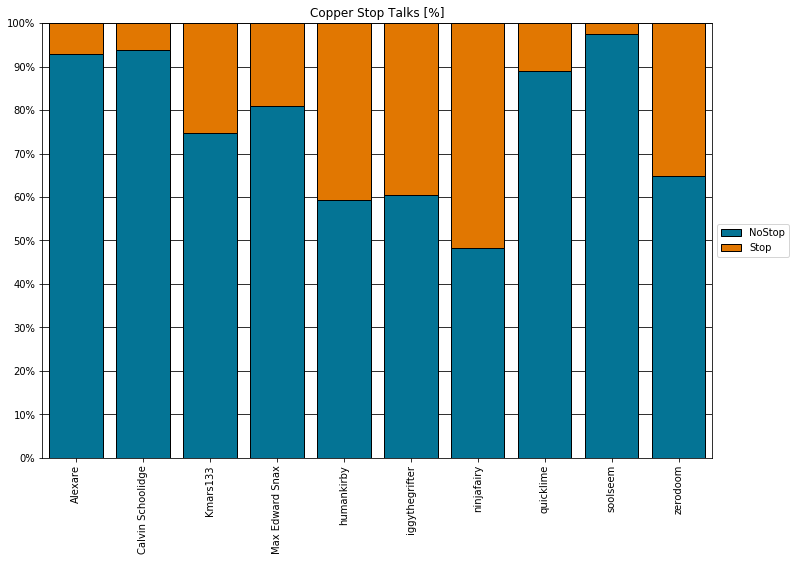

In [111]:
stop_talk_in_game_percentage(div_replays,
    f"{division} Stop Talks",
    groupby=lambda g: g.spy,
    counts_plot=False
)

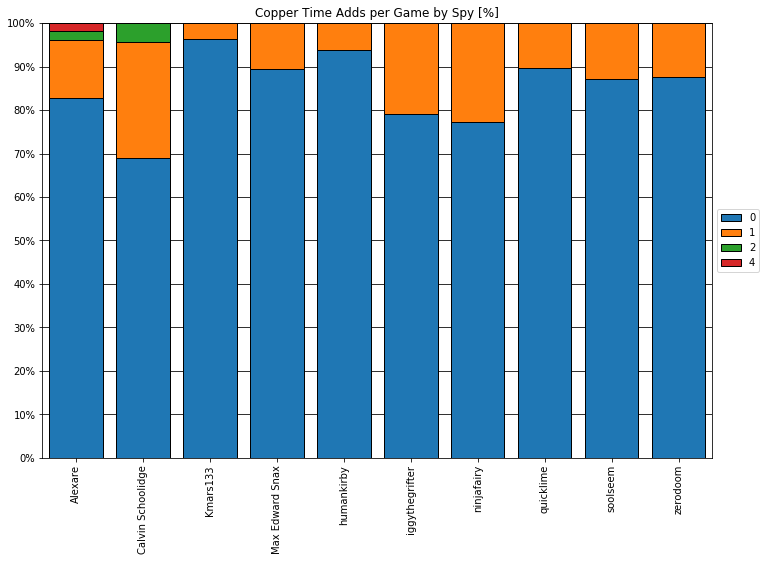

In [112]:
time_add_times_per_game(div_replays,
    f"{division} Time Adds per Game by Spy",
    groupby=lambda g: g.spy,
    counts_plot=False
)